# Rayleigh Scattering <a class="tocSkip">

** Scott Prahl**

** 1 Mar 2018 started **

** Version 1**

In [20]:
# Execute this cell first
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# only needed while developing
import sys
sys.path.append('/Users/prahl/Documents/Code/git/miepython/')

import miepython as mp

def rayleigh(m,x):
    # equations 5.7 - 5.9 from Bohren and Huffman
    ratio = (m**2-1)/(m**2+2)
    qsca = 8/3*x**4*abs(ratio)**2
    qext = 4*x*ratio*(1+x**2/15*ratio*(m**4+27*m**2+38)/(2*m**2+3))
    qext = abs(qext.imag + qsca)
    qback = 4*x**4*abs(ratio)**2
    g = 0
    return qext, qsca, qback, g


def rayleigh_S1_S2(m,x,mu):
    # equation 5.4 from Bohren and Huffman
    a1 = x**2*(m**2-1)/(m**2+2)*1j
    s1 = a1*np.ones_like(mu)
    s2 = a1*mu
    
    ## scale so integral over all angles is single scattering albedo
    qext, qsca, qback, g = rayleigh(m,x)

    factor = np.sqrt(np.pi*qext)
    return s1/factor,s2/factor


def rayleigh_unpolarized(m,x,mu):
    s1, s2 = rayleigh_s1_s2(m,x,mu)
    return (abs(s1)**2+abs(s2)**2)/2

# Background

Mie scattering describes the special case of the interaction of light passing through a non-absorbing medium with a single embedded spherical object.  The sphere itself can be non-absorbing, moderately absorbing, or perfectly absorbing.

Rayleigh scattering is a simple closed-form solution for the scattering from small spheres.

## Goals for this notebook:

* Plot Rayleigh scattering
* Compare total scattering between Rayleigh and Mie
* Compare scattering functions for unpolarized light
* Compare polarized results.

# Rayleigh Scattering phase function


Rayleigh scattering describes the elastic scattering of light by spheres that are much smaller than the wavelength of light. The intensity I of the scattered radiation is given by
$$
I=I_{0}\left(\frac {1+\cos ^{2}\theta }{2R^{2}}\right)
       \left(\frac {2\pi }{\lambda }\right)^{4}
       \left(\frac {n^{2}-1}{n^{2}+2}\right)^{2}
       \left(\frac {d}{2}\right)^{6}
$$
where $I_0$ is the light intensity before the interaction with the particle, $R$ is the distance between the particle and the observer, $\theta$ is the scattering angle, $n$ is the refractive index of the particle, and $d$ is the diameter of the particle.
$$
x = {\pi d\over\lambda} \qquad \rho={R/\lambda}
$$
and thus
$$
I={I_0\over 8\pi^2\rho^2} 
       \left({n^2-1\over n^2+2}\right)^{2}
       x^{4}(1+\cos^2\theta)
$$



In [2]:
## Validate Efficiencies

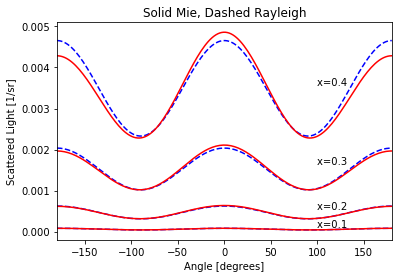

In [21]:
for x in [0.1,0.2,0.3,0.4]:

    m = 1.5-1j
    theta = np.linspace(-180,180,180)
    mu = np.cos(theta*np.pi/180)

    rscat = rayleigh_unpolarized(m,x,mu)
    mscat = mp.i_unpolarized(m,x,mu)
    plt.plot(theta,rscat,'--b')
    plt.plot(theta,mscat,'r')
    plt.annotate('x=%.1f   '%x,(theta[-20],mscat[-20]),ha='right',va='bottom')

plt.xlim(-180,180)
plt.xlabel('Angle [degrees]')
plt.ylabel('Scattered Light [1/sr]')
plt.title('Solid Mie, Dashed Rayleigh')
plt.show()

## Polar Plot

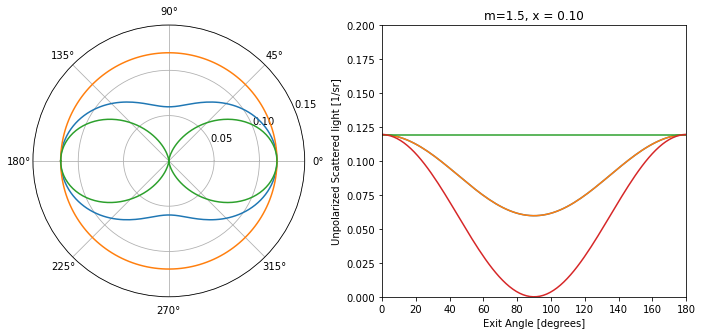

In [30]:
m = 1.5
x = 0.1
theta = np.linspace(-180,180,180)
mu = np.cos(theta/180*np.pi)
unp = rayleigh_unpolarized(m,x,mu)
s1,s2 = rayleigh_S1_S2(m,x,mu)
par = abs(s1)**2
per = abs(s2)**2

fig,ax = plt.subplots(1,2,figsize=(12,5))
ax=plt.subplot(121, projection='polar')
ax.plot(theta/180*np.pi,unp)
ax.plot(theta/180*np.pi,par)
ax.plot(theta/180*np.pi,per)

ax.set_rticks([0.05, 0.1,0.15]) 

plt.subplot(122)
plt.plot(theta,scat)
plt.plot(theta,unp)
plt.plot(theta,par)
plt.plot(theta,per)

plt.xlabel('Exit Angle [degrees]')
plt.ylabel('Unpolarized Scattered light [1/sr]')
plt.title("m=1.5, x = %.2f"%x)

plt.ylim(0.00,0.2)
plt.xlim(0,180)

plt.show()

## test efficiencies

In [41]:
m = 1.5
x = 0.1
qext, qsca, qback, g = mp.mie(m,x)
rext, rsca, rback, rg = rayleigh(m,x)

print('Qext        Qsca        Qback       g')
print("%.5e %.5e %.5e %.5f Mie"%(qext, qsca, qback, g))
print("%.5e %.5e %.5e %.5f Rayleigh"%(rext, rsca, rback, rg))

Qext        Qsca        Qback       g
2.30841e-05 2.30841e-05 3.44629e-05 0.00198 Mie
2.30681e-05 2.30681e-05 3.46021e-05 0.00000 Rayleigh


## test s1 and s2

In [47]:
m = 1.5
x = 0.1
theta = np.linspace(-180,180,180)
mu = np.cos(theta/180*np.pi)

s1,s2 = mp.mie_S1_S2(m,x,mu)
print("%.5e %.5e %.5e %.5f Mie"%(s1[10].real,s1[10].imag,s2[10].real,s2[10].imag))

s1, s2 = rayleigh_s1_s2(m,x,mu)
print("%.5e %.5e %.5e %.5f Rayleigh"%(s1[10].real,s1[10].imag,s2[10].real,s2[10].imag))

6.77672e-05 3.44729e-01 -6.36350e-05 -0.32369 Mie
0.00000e+00 3.45494e-01 -0.00000e+00 -0.32443 Rayleigh
